# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission, if necessary. Sections that begin with **'Implementation'** in the header indicate where you should begin your implementation for your project. Note that some sections of implementation are optional, and will be marked with **'Optional'** in the header.

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [1]:

import pickle, cv2
from sklearn.model_selection import train_test_split
import numpy as np
from tensorflow.contrib.layers import flatten
import tensorflow as tf
from sklearn.utils import shuffle
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import matplotlib.image as mpimg


%matplotlib inline

n_classes = 43

In [2]:
training_file = 'train.p'
testing_file = 'test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_test, y_test = test['features'], test['labels']

---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 2D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below.

In [3]:
# TODO: Number of training examples
n_train = len(X_train)

# TODO: Number of testing examples.
n_test = len(X_test)

# TODO: What's the shape of an traffic sign image?
image_shape = X_train[0].shape

# TODO: How many unique classes/labels there are in the dataset.
n_classes = len(set(test['labels']))

test_proportion = n_test/(n_train+n_test)

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Total number of examples =", n_train+n_test)
print("Percentage of test data = ", test_proportion*100)
print("Image data shape =", image_shape)
print("Label data shape = ", y_train.shape)
print("Number of classes =", n_classes)

Number of training examples = 39209
Number of testing examples = 12630
Total number of examples = 51839
Percentage of test data =  24.363895908485887
Image data shape = (32, 32, 3)
Label data shape =  (39209,)
Number of classes = 43


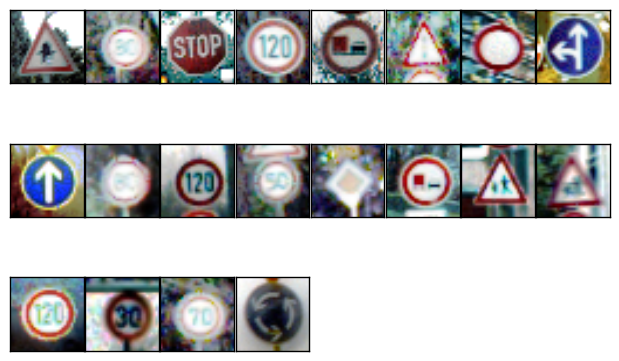

In [11]:
### Data exploration visualization goes here.
### Feel free to use as many code cells as needed.


X_train, y_train = shuffle(X_train, y_train)

def plot_head(X, num = 20, cols = 8, cmap = 'jet'):
    fig = plt.figure(1)
    rows = np.ceil(num/cols).astype(np.int32)
    gs = gridspec.GridSpec(rows, cols, top=1., bottom=0., right=1., left=0., hspace=0.01,
            wspace=0.02)
    for i in range(num):
        row = np.floor(i/cols).astype(np.int32)
        col = i - row*cols
        ax = plt.subplot(gs[row, col])
        ax.set_xticks([])
        ax.set_yticks([])
        ax.imshow(X[i], cmap = cmap)
    plt.show()
plot_head(X_train)

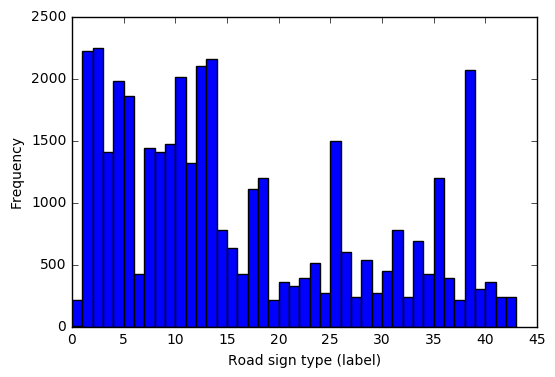

In [5]:
plt.hist(y_train, bins=range(n_classes+1))
plt.ylabel("Frequency")
plt.xlabel("Road sign type (label)")
plt.show()

Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc.

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections.

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

There are various aspects to consider when thinking about this problem:

- Neural network architecture
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

**NOTE:** The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play!

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

In [4]:
### Preprocess the data here.
### Feel free to use as many code cells as needed.
images = np.vstack((train['features'], test['features']))
labels = np.concatenate((train['labels'], test['labels']))

def preprocess(image):
    image[:,:,0] = cv2.equalizeHist(image[:,:,0])
    image[:,:,1] = cv2.equalizeHist(image[:,:,1])
    image[:,:,2] = cv2.equalizeHist(image[:,:,2])
    return image

images = np.array([preprocess(images[i]) for i in range(len(images))])

### Question 1 

_Describe how you preprocessed the data. Why did you choose that technique?_

**Answer:** On the plot above one can see that some images are darker while another are lighter, so decided to perform histogram equalization on all RGB channels. This method gave significant improvement in accuracy, however in some cases histogram equalization could lead to distoring the image - especially in cases when the image was processed before. I tried YUV conversion and then normalization of Y channel, however histogram equalization worked better with my nets.

In [5]:
### Generate data additional data (OPTIONAL!)
### and split the data into training/validation/testing sets here.
### Feel free to use as many code cells as needed.

In [6]:
test_proportion = 0.2
validation_proportion = 0.2
X_1, X_test, y_1, y_test = train_test_split(
    images, 
    labels,
    test_size = test_proportion,
    random_state=832289)
X_train, X_validation, y_train, y_validation = train_test_split(
    X_1, y_1,
    test_size = validation_proportion/(1-test_proportion),
    random_state=832289)
n_train = len(X_train)
n_valid = len(X_validation)
n_test = len(X_test)
print("Train: {}, test: {}, validation: {}".format(n_train, n_valid, n_test))
print("Train data shape: {}".format(X_train.shape))
plot_head(X_train)



Train: 31103, test: 10368, validation: 10368
Train data shape: (31103, 32, 32, 3)


NameError: name 'plot_head' is not defined

In [ ]:
freq = np.unique(y_train, return_counts = True)
print("Number of classes in train: {}".format(len(freq[0])))
min_samples = min(freq[1])
max_samples = max(freq[1])
print("Minimum number of samples: {}".format(min_samples))
print("Maximum number of samples: {}".format(max_samples))
print("Minimum = {} % of maximum".format(min_samples/max_samples*100))
to_equal = max_samples-freq[1]
print("To make train balanced, we have to add {} samples, median is {} per class".format(
    sum(to_equal), np.median(to_equal)))

In [10]:
def distort(img):
    rows, cols, _ = img.shape
    transx, transy = np.round(np.random.uniform(size = 2)*4-2)
    
    angle = np.round(np.random.uniform()*30-15)
    M = cv2.getRotationMatrix2D((cols/2, rows/2), angle, 1.0)
    img = cv2.warpAffine(img, M, (cols, rows))
    M = np.float32([[1, 0, transx],[0, 1, transy]])
    img = cv2.warpAffine(img, M, (cols, rows))
    return img
        
    

In [11]:
X_aug = []
y_aug = []

for l in range(n_classes):
    ndx = np.where(y_train == l)
    trans_per_img = np.round(to_equal[l]/freq[1][l])
    trans_per_img = trans_per_img.astype(np.int32)
    for i in np.nditer(ndx):
        for n in range(trans_per_img):
            X_aug.append(distort(X_train[i]))
            y_aug.append(l)
X_aug = np.array(X_aug, dtype = np.float32)
y_aug = np.array(y_aug, dtype = np.float32)
print(X_aug.shape, y_aug.shape)

(49021, 32, 32, 3) (49021,)


In [12]:
X_train = np.vstack((X_train, X_aug))
y_train = np.concatenate((y_train, y_aug))
X_train, y_train = shuffle(X_train, y_train)
print(X_train.shape, y_train.shape)

(80124, 32, 32, 3) (80124,)


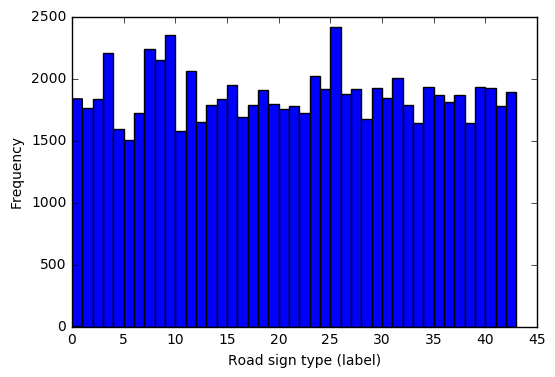

In [13]:
plt.hist(y_train, bins=range(n_classes+1))
plt.ylabel("Frequency")
plt.xlabel("Road sign type (label)")
plt.show()

### Question 2

_Describe how you set up the training, validation and testing data for your model. **Optional**: If you generated additional data, how did you generate the data? Why did you generate the data? What are the differences in the new dataset (with generated data) from the original dataset?_

**Answer:** I decided to split the data into three sets: trainig 60% validation 20% test 20%.

The histograms show that data is unbalanced - it could have an impact on prediction accuracy of classes with low number of samples, however I did not check how big. 
I added samples for under represented classes, it had no effect on overall accuracy, however the model required less epochs to yield descent results.


In [14]:
### Define your architecture here.
### Feel free to use as many code cells as needed.

In [7]:
def fully_connected(layer, out_connections, mean = 0, stddev = 0.1, 
                    in_connections = None, activation = 'relu', 
                    dropout = False):
    
    if not in_connections:
        layer_shape = layer.get_shape().as_list()
        in_connections = layer_shape[-1]
    weights = tf.Variable(tf.truncated_normal([in_connections, out_connections], 
                                              mean = mean, stddev = stddev))
    biases = tf.Variable(tf.zeros(out_connections))
    layer = tf.matmul(layer, weights) + biases
    
    if activation == 'relu':
        layer = tf.nn.relu(layer)
    elif activation == 'tanh':
         layer = tf.tanh(layer)
    if dropout:
        layer = tf.nn.dropout(layer, keep_prob)
    return layer



def MyLeNet(x):    
    # Hyperparameters
    mu = 0
    sigma = 0.1
    
    #Convert to gray
    x = tf.image.rgb_to_grayscale(x, name='gray')
    x /= 255.
        
    # Layer 1: Convolutional.
    out_filters = 32
    l1w = tf.Variable(tf.truncated_normal([5, 5, 1, out_filters], mean = mu, stddev = sigma))
    l1b = tf.Variable(tf.zeros(out_filters))
    strides = [1, 1, 1, 1]
    padding = 'VALID'
    lenet = tf.nn.conv2d(x, l1w, strides, padding) + l1b
    print(lenet.get_shape().as_list())
  
    # Activation.
    
    lenet = tf.tanh(lenet)

    # Pooling. 
    ksize = [1, 2, 2, 1]
    strides = [1, 2, 2, 1]
    lenet = tf.nn.max_pool(lenet, ksize, strides, padding)
    print(lenet.get_shape().as_list())
   
    # Convolutional #2
    layer_shape = lenet.get_shape().as_list()
    in_filters = layer_shape[-1]
    out_filters = 64
    
    l2w = tf.Variable(tf.truncated_normal([5, 5, in_filters ,out_filters], mean = mu, stddev = sigma))
    l2b = tf.Variable(tf.zeros(out_filters))
    strides = [1, 1, 1, 1]
    padding = 'VALID'
    lenet = tf.nn.conv2d(lenet, l2w, strides, padding) + l2b
    print(lenet.get_shape().as_list())
    
    #  Activation.
    lenet = tf.tanh(lenet)

    # Pooling. 
    ksize = [1, 2, 2, 1]
    strides = [1, 2, 2, 1]
    lenet = tf.nn.max_pool(lenet, ksize, strides, padding)
    print(lenet.get_shape().as_list())

    # Flatten. 
    lenet = flatten(lenet)
    print(lenet.get_shape().as_list())
    
    lenet = fully_connected(lenet, out_connections = 512, 
                            mean = mu, stddev = sigma, dropout = True)
    print(lenet.get_shape().as_list())
    
    lenet = fully_connected(lenet, out_connections = 128, 
                           mean = mu, stddev = sigma, dropout = True)
    print(lenet.get_shape().as_list())
    
    logits = fully_connected(lenet, out_connections = n_classes,
                            mean = mu, stddev = sigma, activation = False)
    return logits

In [8]:
x = tf.placeholder(tf.float32, (None, 32, 32, 3))
y = tf.placeholder(tf.int32, (None))
one_hot_y = tf.one_hot(y, n_classes)
rate = 0.001
keep_prob = tf.placeholder(tf.float32)

logits = MyLeNet(x)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits, one_hot_y)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)

[None, 28, 28, 32]
[None, 14, 14, 32]
[None, 10, 10, 64]
[None, 5, 5, 64]
[None, 1600]
[None, 512]
[None, 128]


In [9]:
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    total_loss = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy, loss = sess.run([accuracy_operation, loss_operation],
                                  feed_dict={x: batch_x, y: batch_y, keep_prob: 1})
        total_accuracy += (accuracy * len(batch_x))
        total_loss += (loss * len(batch_x))
        
    total_accuracy /=num_examples
    total_loss /=num_examples
    return (total_accuracy, total_loss)

In [18]:
EPOCHS = 40
BATCH_SIZE = 128

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train)
    
    print("Training...")
    print()
    for i in range(EPOCHS):
        #X_train, y_train = shuffle(X_train, y_train)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train[offset:end], y_train[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y, keep_prob: 0.5})
            
        validation_accuracy, validation_loss = evaluate(X_validation, y_validation)
        print("EPOCH {} ...".format(i+1))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        print("Validation Loss = {:.3f}".format(validation_loss))
        print()
        
    saver.save(sess, 'signs')
    print("Model saved")

Training...

EPOCH 1 ...
Validation Accuracy = 0.923
Validation Loss = 0.294

EPOCH 2 ...
Validation Accuracy = 0.958
Validation Loss = 0.144

EPOCH 3 ...
Validation Accuracy = 0.978
Validation Loss = 0.089

EPOCH 4 ...
Validation Accuracy = 0.980
Validation Loss = 0.068

EPOCH 5 ...
Validation Accuracy = 0.981
Validation Loss = 0.061

EPOCH 6 ...
Validation Accuracy = 0.986
Validation Loss = 0.052

EPOCH 7 ...
Validation Accuracy = 0.987
Validation Loss = 0.047

EPOCH 8 ...
Validation Accuracy = 0.988
Validation Loss = 0.041

EPOCH 9 ...
Validation Accuracy = 0.984
Validation Loss = 0.053

EPOCH 10 ...
Validation Accuracy = 0.989
Validation Loss = 0.039

EPOCH 11 ...
Validation Accuracy = 0.988
Validation Loss = 0.043

EPOCH 12 ...
Validation Accuracy = 0.989
Validation Loss = 0.040

EPOCH 13 ...
Validation Accuracy = 0.989
Validation Loss = 0.035

EPOCH 14 ...
Validation Accuracy = 0.992
Validation Loss = 0.030

EPOCH 15 ...
Validation Accuracy = 0.991
Validation Loss = 0.030

EPOCH 

### Question 3

_What does your final architecture look like? (Type of model, layers, sizes, connectivity, etc.)  For reference on how to build a deep neural network using TensorFlow, see [Deep Neural Network in TensorFlow
](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/b516a270-8600-4f93-a0a3-20dfeabe5da6/concepts/83a3a2a2-a9bd-4b7b-95b0-eb924ab14432) from the classroom._


**Answer:** I tried multiple CNNs to achieve good results and ended up with a solution inspired by Sameh Mohamed: http://sdc.autojazari.com/traffic-sign-detection-using-convnets/ : 
* 1st level: Convert to grayscale, output 32x32x1
* 2nd level: Convolutional layer with 32 filters + pooling + tanh activation, output 14x14x32
* 3rd level: Convolutional layer with 64 filters + pooling + tanh activation, output 5x5x64
* 4rd level: Flatte + fully connected with 512 outputs + dropout 0.5 + relu activation
* 5th level: Fully connected with 128 outputs + dropout 0.5 + relu activation
* 6th level: output layer to calculate softmax

![title](network.png)


In [19]:
### Train your model here.
### Feel free to use as many code cells as needed.

In [20]:
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))

    test_accuracy, _ = evaluate(X_test, y_test)
    print("Test Accuracy = {:.3f}".format(test_accuracy))

Test Accuracy = 0.994


### Question 4

_How did you train your model? (Type of optimizer, batch size, epochs, hyperparameters, etc.)_


**Answer:** I found that batch size of 128 gives good results together with learning rate 1e-3.

Depending on the data and network architecture, I exeperimented with multiple epochs in range from 20 to 200 and ended with up with 40 epochs.

For the optimizer, I checked ordinary gradient descent vs Adam and Adam won due to decay I think :-)

### Question 5


_What approach did you take in coming up with a solution to this problem? It may have been a process of trial and error, in which case, outline the steps you took to get to the final solution and why you chose those steps. Perhaps your solution involved an already well known implementation or architecture. In this case, discuss why you think this is suitable for the current problem._

**Answer:** I went through this project using 2 paths:
* Tweak LeNet to see how it will impact the accuracy and convergence time - this approach gave me around 98% of accuracy
* Search for another architectures: the one from Yann LeCun paper did not work as expected, probably due to my mistakes. Checked buch of another approaches to CNN architecture and eventually found the one developed by Sameh Mohamed - it was quite similar to my experiments with LeNet in convolution layers, however he used bigger fully connected layeers. I decided to go with this architecture and tweak it a little - change relu for tanh for convolutional layers etc.

---

## Step 3: Test a Model on New Images

Take several pictures of traffic signs that you find on the web or around you (at least five), and run them through your classifier on your computer to produce example results. The classifier might not recognize some local signs but it could prove interesting nonetheless.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

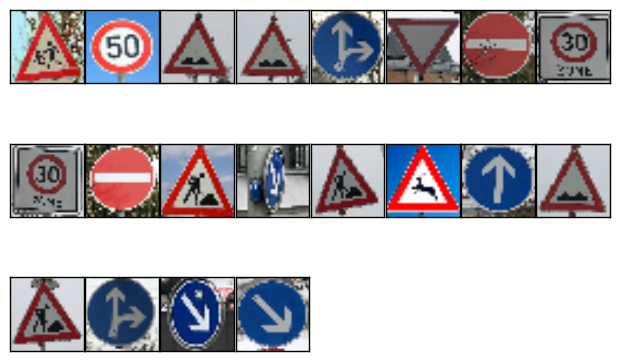

In [12]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.

BATCH_SIZE = 128


fname = 'new_signs.p'
with open(fname, mode='rb') as f:
    new_signs = pickle.load(f)
X_new = new_signs['data']
y_new = new_signs['labels']
plot_head(X_new)

### Question 6

_Choose five candidate images of traffic signs and provide them in the report. Are there any particular qualities of the image(s) that might make classification difficult? It could be helpful to plot the images in the notebook._



**Answer:** I checked the entire dataset of new German traffisc sign photos made by KonArtist02 available here: https://github.com/KonArtist02/CarND-Traffic-Sign-Classifier-Project.git

Some of the pictures are made with very high angle, some other were not presented in the training set. There are stickers on some of the signs.

In [13]:
### Run the predictions here.
### Feel free to use as many code cells as needed.
saver = tf.train.Saver()
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))

    test_accuracy, _ = evaluate(X_new, y_new)
    softmax = tf.nn.softmax(logits)
    top5 = tf.nn.top_k(softmax, 5)
    pred, top5_pred = sess.run([softmax, top5], feed_dict ={x: X_new, keep_prob: 1})

### Question 7

_Is your model able to perform equally well on captured pictures when compared to testing on the dataset? The simplest way to do this check the accuracy of the predictions. For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate.

**Answer:** My model performs worse on the real life images, there could be a lot of reasons for this. The most obvious answer could be to get more data or try more aggresivve augmentation, however the best way to start is to look at the cases, the model performed bad. Next cell contains more detailed analysis.

In [14]:
### Visualize the softmax probabilities here.
### Feel free to use as many code cells as needed.
print("Real Life Images Accuracy = {:.3f}".format(test_accuracy))

Real Life Images Accuracy = 0.897


### Question 8

*Use the model's softmax probabilities to visualize the **certainty** of its predictions, [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. Which predictions is the model certain of? Uncertain? If the model was incorrect in its initial prediction, does the correct prediction appear in the top k? (k should be 5 at most)*

**Answer:** I visualized the softmax probabilities and "certainity" in 2 ways:
* first I calculated, how certain is the prediction: divided the prediction probability by the sum of it and second probability. The result is shown in percent for sake of readiness
* second, I showed image which was checked together with 5 candidates proposed by the algortihm - first picture from the left is the checked image, the reaining 5 are top 5 candidates

In [15]:
def get_img(label):
    """Get sample image with label
        Implementation: first image with such label from X_train
    """
    ndx = y_train == label
    return X_train[ndx][0]

 Picture 0, certainity: 99%


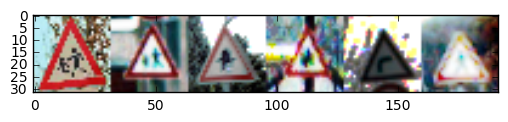

 Picture 1, certainity: 100%


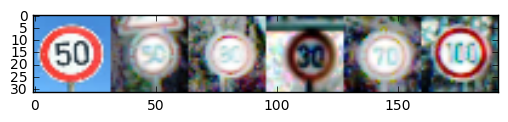

 Picture 2, certainity: 100%


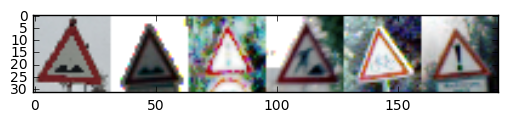

 Picture 3, certainity: 100%


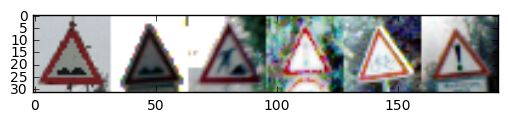

 Picture 4, certainity: 100%


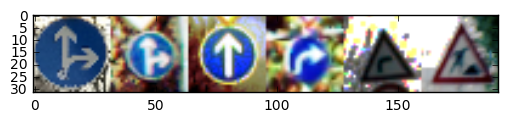

 Picture 5, certainity: 100%


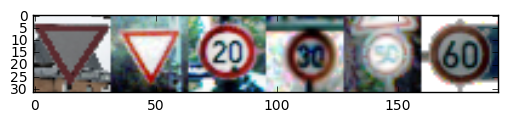

 Picture 6, certainity: 100%


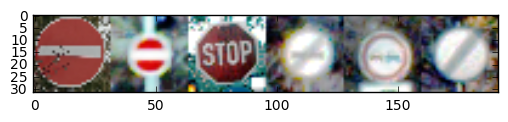

Wrong!! Picture 7, certainity: 94%


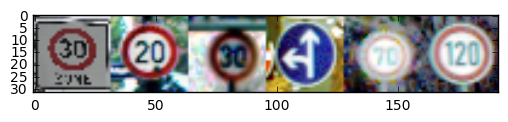

Wrong!! Picture 8, certainity: 97%


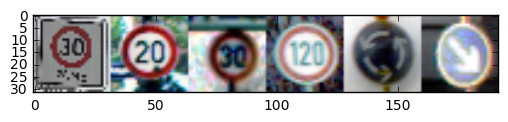

 Picture 9, certainity: 100%


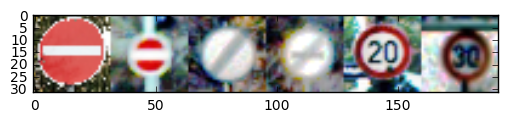

 Picture 10, certainity: 100%


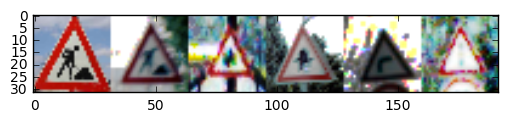

Wrong!! Picture 11, certainity: 66%


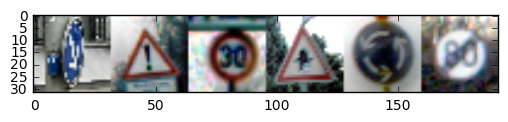

 Picture 12, certainity: 100%


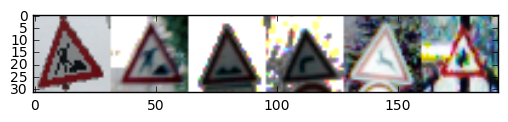

 Picture 13, certainity: 100%


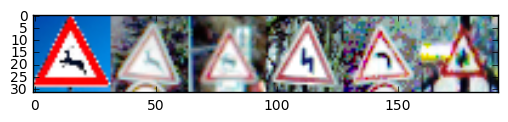

 Picture 14, certainity: 100%


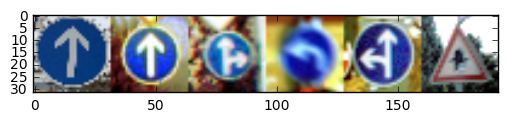

 Picture 15, certainity: 100%


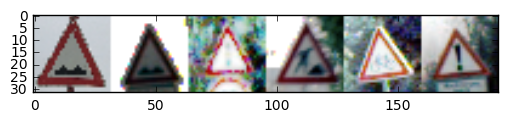

 Picture 16, certainity: 100%


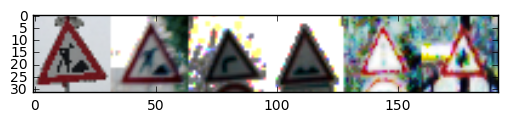

 Picture 17, certainity: 100%


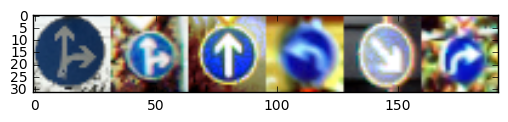

 Picture 18, certainity: 100%


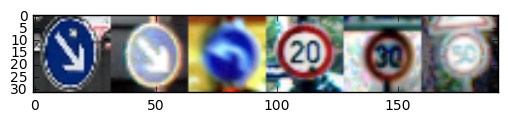

 Picture 19, certainity: 100%


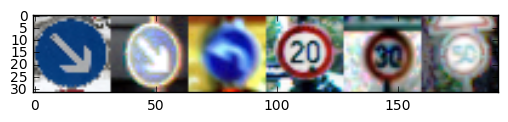

 Picture 20, certainity: 100%


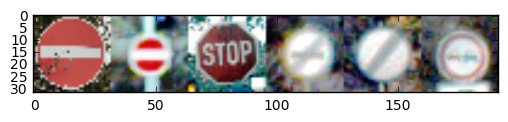

 Picture 21, certainity: 100%


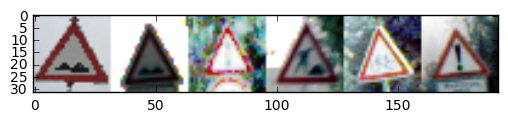

 Picture 22, certainity: 100%


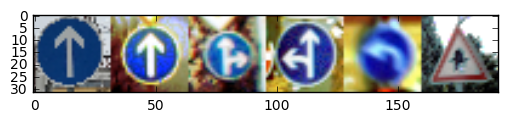

 Picture 23, certainity: 100%


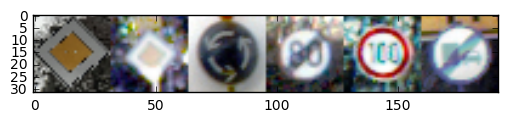

 Picture 24, certainity: 100%


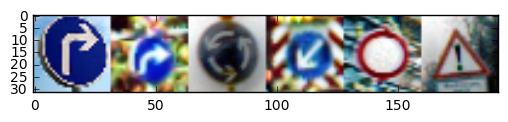

 Picture 25, certainity: 100%


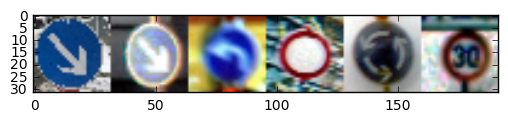

 Picture 26, certainity: 100%


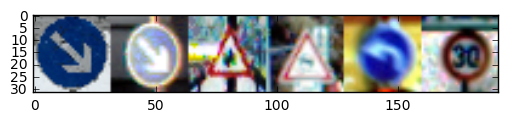

 Picture 27, certainity: 100%


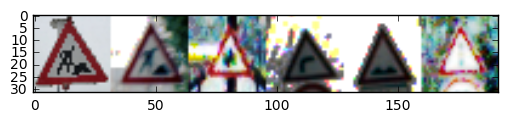

 Picture 28, certainity: 100%


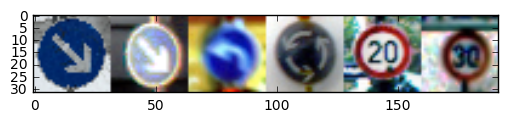

In [16]:
rows = len(X_new)
for i in range(len(X_new)):
    plt.figure()
    img = X_new[i, :, :, :]
    ndx = top5_pred.indices[i]
    status = ""
    if ndx[0] != y_new[i]:
        status = "Wrong!!"
    pred = top5_pred.values[i]
    for j in range(len(ndx)):
        img = np.hstack((img, get_img(ndx[j])))
    plt.imshow(img)
    certainity = 100* pred[0]/(pred[0]+pred[1])
    print("{} Picture {}, certainity: {:.0f}%".format(status, i, certainity))
   
    plt.show()

One can observe that in most cases the algorithm is very confident of the result, however in some cases it is not.
Four of the cases are mistakes - pictures 7 and 8 were not present in the training set, therefore can not be classified correctly. Picture 11 was made under very high angle and augmentation did not cover such big angles. 

In one case certainity was 85% and the classification was good - such low certainity could be caused by lack of similar pictures in the trainig set, so augmentation should help.


